In [1]:
# 라이브러리 임포트
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score, calinski_harabasz_score

In [2]:
# Iris 데이터 데이터 파일(Iris.csv) 불러오기
x_df = pd.read_csv('Dataset/Iris.csv') 
x_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# 데이터를 numpy array 형태로 추출
x = x_df.iloc[:, 1:5].values

In [4]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
# 실제 label 도출
unique_species = np.unique(x_df['Species'])

labels_true = np.zeros(x.shape[0])
for i, species in enumerate(unique_species):
    labels_true[x_df['Species'] == species] = i

print(labels_true)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


In [8]:
# 군집 개수 후보 리스트
num_clusters_set = np.arange(2, 11)
num_clusters_set

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

### Adjusted-RI

* 값은 (Adjusted-RI) ≤ 1 에 위치함 


* 클러스터링 결과가 label값과 일치할수록 1에 가깝고, 일치하지 않을수록 0과 가까움


* 무작위로 군집화에도 Rand Index가 어느정도 나오기 때문에 이를 방지하기 위해 Adjusted-RI를 사용

In [9]:
unique_species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
labels_true

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [14]:
?adjusted_rand_score

In [11]:
for num_clusters in num_clusters_set:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
    kmeans.fit(x)
    
    labels_pred = kmeans.labels_
    
    print('num_clusters: ', num_clusters, 
          '| adjusted RI: ', adjusted_rand_score(labels_true, labels_pred))

num_clusters:  2 | adjusted RI:  0.5399218294207123
num_clusters:  3 | adjusted RI:  0.7302382722834697
num_clusters:  4 | adjusted RI:  0.6498176853819967
num_clusters:  5 | adjusted RI:  0.6078964652364223
num_clusters:  6 | adjusted RI:  0.45370649337406077
num_clusters:  7 | adjusted RI:  0.47723285790557546
num_clusters:  8 | adjusted RI:  0.44256583172768144
num_clusters:  9 | adjusted RI:  0.4402751478767263
num_clusters:  10 | adjusted RI:  0.3913077471877719


## 실루엣

* 실루엣계수는 값이 클수록 좋은 군집화라 판단할 수 있음.

In [18]:
?silhouette_score

In [13]:
for num_clusters in num_clusters_set:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
    kmeans.fit(x)
    
    labels_pred = kmeans.labels_
    
    print('num_clusters: ', num_clusters, 
          '| silhouette: ', silhouette_score(x, labels_pred, metric='euclidean'))

num_clusters:  2 | silhouette:  0.6808136202936816
num_clusters:  3 | silhouette:  0.5525919445499757
num_clusters:  4 | silhouette:  0.4978256901095472
num_clusters:  5 | silhouette:  0.4885175508886279
num_clusters:  6 | silhouette:  0.36339909677539595
num_clusters:  7 | silhouette:  0.3600597997328459
num_clusters:  8 | silhouette:  0.3651645360269737
num_clusters:  9 | silhouette:  0.33615306332758216
num_clusters:  10 | silhouette:  0.32790189472671377


## CH-index

* 클러스터 내의 분산 값과 클러스터 간의 분산 값의 비를 나타낸 것


* 클러스터 내의 분산 값은 작고, 클러스터 간의 분산 값은 클수록 클러스터링의 결과가 좋다고 할 수 있음.


* CH-index 값이 클수록 클러스터링 결과가 좋다고 할 수 있음.

In [20]:
?calinski_harabasz_score

In [14]:
for num_clusters in num_clusters_set:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
    kmeans.fit(x)
    
    labels_pred = kmeans.labels_
    
    print('num_clusters: ', num_clusters, 
          '| CH-index: ', calinski_harabasz_score(x, labels_pred))

num_clusters:  2 | CH-index:  513.3038433517568
num_clusters:  3 | CH-index:  560.3999242466402
num_clusters:  4 | CH-index:  529.3982941434156
num_clusters:  5 | CH-index:  493.79768982240194
num_clusters:  6 | CH-index:  471.5857030612081
num_clusters:  7 | CH-index:  450.7495385397598
num_clusters:  8 | CH-index:  438.7984995309182
num_clusters:  9 | CH-index:  413.3759816929362
num_clusters:  10 | CH-index:  388.2947170500026


# 실습
* syn_unbalanced.xlsx 파일을 불러온다.
2. k-means나 gaussian 군집 방법을 선택한다.
3. 군집수 3~10까지에 대해 silhouette value와 CH-index를 이용해 적합한 군집수 후보를 3개 찾는다.
4. 선택한 3개 군집수에 대한 분석 결과 plot을 그리기

In [15]:
sys_data = pd.read_excel('Dataset/syn_unbalance.xlsx')
sys_data

,151700,351102
0,155799,354358
1,142857,352716
2,152726,349144
3,151008,349692
4,145865,351895
...,...,...
6494,538990,412773
6495,533767,393738
6496,546754,394768
6497,541605,396515


## K-means + manual_check

##########
3 is start!
num_clusters:  3 | silhouette:  0.6472485178536963
num_clusters:  3 | CH-index:  38397.00756972477
##########
4 is start!
num_clusters:  4 | silhouette:  0.8547867457068603
num_clusters:  4 | CH-index:  47982.17024327136
##########
5 is start!
num_clusters:  5 | silhouette:  0.8317188757652336
num_clusters:  5 | CH-index:  61176.200731747034
##########
6 is start!
num_clusters:  6 | silhouette:  0.8398911709235045
num_clusters:  6 | CH-index:  75579.19583702946
##########
7 is start!
num_clusters:  7 | silhouette:  0.8501077069746047
num_clusters:  7 | CH-index:  122041.15280181121
##########
8 is start!
num_clusters:  8 | silhouette:  0.8577469483074085
num_clusters:  8 | CH-index:  221418.84878269312
##########
9 is start!
num_clusters:  9 | silhouette:  0.6872771106134594
num_clusters:  9 | CH-index:  206626.1314765093
##########
10 is start!
num_clusters:  10 | silhouette:  0.5178753320831226
num_clusters:  10 | CH-index:  196506.65539014927


In [17]:
def plot_clustering(data, model):
    unique_labels = np.unique(model.labels_)  # 군집 종류

    for i in unique_labels:  # 각 군집에 대해
        cluster_instance_mask = (model.labels_ == i)

        x_cluster_i = data[cluster_instance_mask, :]  # 해당 군집에 해당하는 인스턴스

        plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))  # 1번째, 2번째 변수를 이용해 plotting

    plt.title('Clustering result')
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.legend()
    plt.show()
    return

##########
4  is start!


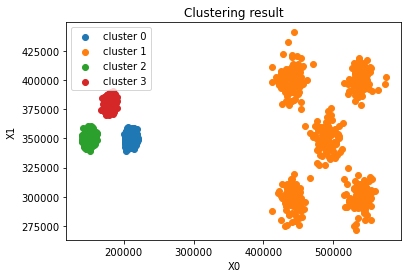

##########
7  is start!


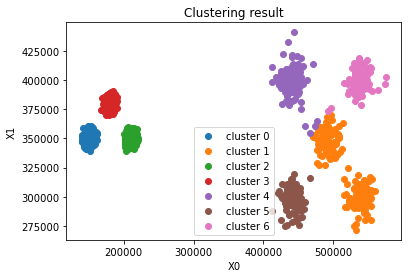

##########
8  is start!


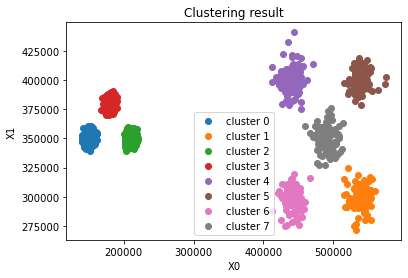

##########
9  is start!


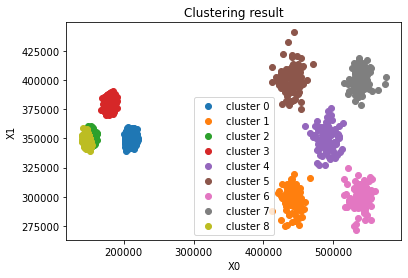

In [18]:
x = sys_data.to_numpy()

num_clusters = [4, 7, 8, 9]

for i in num_clusters:
    print('#'*10)
    print(str(i), ' is start!')
    kmeans = KMeans(n_clusters=i, init='k-means++').fit(x)
    plot_clustering(x, kmeans)

## Gaussian(full) + auto_selection

##########
3 is start!
num_clusters:  3 | silhouette:  0.6457214724130216
num_clusters:  3 | CH-index:  38277.99729561086
##########
4 is start!
num_clusters:  4 | silhouette:  0.8547867457068603
num_clusters:  4 | CH-index:  47982.17024327136
##########
5 is start!
num_clusters:  5 | silhouette:  0.8318466820340715
num_clusters:  5 | CH-index:  61132.66614546503
##########
6 is start!
num_clusters:  6 | silhouette:  0.8338292184736368
num_clusters:  6 | CH-index:  53810.56713440688
##########
7 is start!
num_clusters:  7 | silhouette:  0.8494364032031813
num_clusters:  7 | CH-index:  116419.4533319559
##########
8 is start!
num_clusters:  8 | silhouette:  0.8577469483074085
num_clusters:  8 | CH-index:  221418.84878269318
##########
9 is start!
num_clusters:  9 | silhouette:  0.683449995890137
num_clusters:  9 | CH-index:  205270.78048553623
##########
10 is start!
num_clusters:  10 | silhouette:  0.5241956728106612
num_clusters:  10 | CH-index:  197914.8302895981


In [55]:
chI_by_clu = list(zip(num_clusters_set, ch_list))
chI_by_clu.sort(key = lambda x: -x[1])

In [57]:
def plot_clustering(data, model):
    unique_labels = np.unique(model.predict(data))  # 군집 종류

    for i in unique_labels:  # 각 군집에 대해
        cluster_instance_mask = (model.predict(data) == i)

        x_cluster_i = data[cluster_instance_mask, :]  # 해당 군집에 해당하는 인스턴스

        plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))  # 1번째, 2번째 변수를 이용해 plotting

    plt.title('Clustering result')
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.legend()
    plt.show()
    return

##########
8  is start!


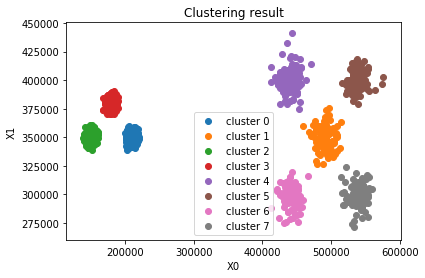

##########
9  is start!


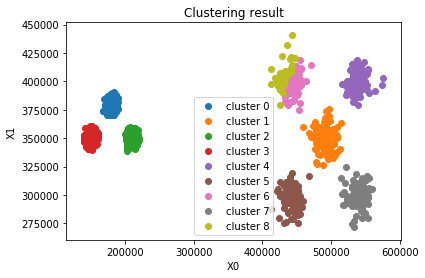

##########
10  is start!


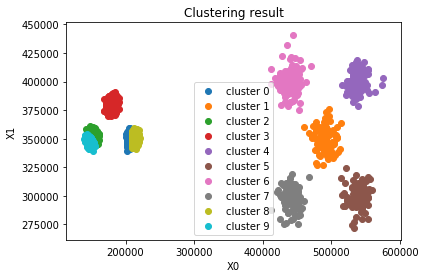

In [60]:
num_clusters = [i for i, j in chI_by_clu[:3]]

for i in num_clusters:
    print('#'*10)
    print(str(i), ' is start!')
    gmm = GaussianMixture(n_components=i, 
                     covariance_type='full').fit(x)
    plot_clustering(x, gmm)

## Reference

- https://datascienceschool.net/view-notebook/54ee87f1caf84311a0efcbe73fa9e1ea/

- http://scikit-learn.org/stable/modules/clustering.html